# Incarceration and Race

---

You will be learning about historical events that have impacted incarceration rates across different racial groups.

**Estimated Time:** ~30 minutes

---

## 1. Introduction to Data

- a. Overview of Data Table  
- b. Explanation of Table Columns  
- c. Question 1  
- d. First Look  

## 2. War on Drugs

- a. Introduction to the War on Drugs  
- b. Crack vs. Cocaine  
- c. Growth Rate of Drug Use  
- d. Question 2  
- e. 1990s Drug Drop  
- f. Percent of Arrests by Population  
- g. Questions 3 and 4  

## 3. Redlining

- a. County-Level Data  
- b. Historical Context of Redlining in Counties  
- c. Question 5  

## 4. Sources


# Introduction 

### Import Libraries 
To start off with we need to load in some libraries, things like Numpy that we learned. Run the cell below to do so

In [2]:
from datascience import * # Loads functions from the datascience library into our current environment
import numpy as np # Loads numerical functions
import math, random # Loads math and random functions
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Latex, Markdown
%matplotlib inline
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Video
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')
import helper as hp

# Helper Video

##### Use the following link for a follow-along video to help guide you through the notebook:


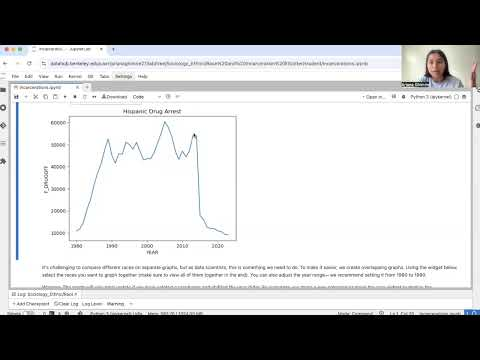

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("X2NvxzQ2CvI", width=560, height=315)

### Data

The Department of Justice (DOJ) Criminal Justice Statistics Center (CJSC) collects information on arrests and citations  
(from now on referred to as “arrest(s)”) as reported by law enforcement agencies (LEAs) throughout the state.  
The Monthly Arrest and Citation Register (MACR) data is submitted monthly by LEAs and includes summary arrest counts  
submitted to the Federal Bureau of Investigation’s (FBI) Uniform Crime Reporting Program (UCR).

Arrest data provides information on felony and misdemeanor-level arrests for adults and juveniles,  
as well as status offenses (e.g., truancy, incorrigibility, running away, and curfew violations) for juveniles.  
This data includes aggregated arrest counts by reporting county, age, gender, and race/ethnic group of the arrestee.  
The Arrest Disposition data also includes information about the outcome of law enforcement contact.

---

Run the cell below to load the dataset, view the first few rows, and examine the column names.


In [3]:
arrest = hp.arrest
arrest

,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Sum Total
0,1980,Male,Black,Under 18,Alameda County,505,1351,188,26,79,2149,2286,295,4730
1,1980,Male,Black,18 to 19,Alameda County,205,465,183,8,48,909,1333,0,2242
2,1980,Male,Black,20 to 29,Alameda County,949,1593,606,27,178,3353,7974,0,11327
3,1980,Male,Black,30 to 39,Alameda County,450,755,241,18,110,1574,4876,0,6450
4,1980,Male,Black,40 to 69,Alameda County,172,218,117,11,66,584,3836,0,4420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107045,2023,Female,White,70 and over,Tulare County,0,0,0,0,0,0,7,0,7
107046,2023,Female,White,70 and over,Tuolumne County,0,0,0,0,0,0,1,0,1
107047,2023,Female,White,70 and over,Ventura County,1,0,0,0,1,2,26,0,28
107048,2023,Female,White,70 and over,Yolo County,0,0,0,0,1,1,4,0,5


Run the next cell below to see our columns 

In [4]:
print(arrest.columns)

Index(['YEAR', 'GENDER', 'RACE', 'AGE_GROUP', 'COUNTY', 'VIOLENT', 'PROPERTY',
       'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL',
       'Sum Total'],
      dtype='object')


### Review of Column Labels and Their Descriptions

- **Year** – The year the data was collected, ranging from 1980 to 2023.

- **Gender** – Includes two categories: male and female.

- **Race** – Categorized as White, Black, Hispanic, and Other.

- **Age Group** – Grouped into the following brackets:
  - Under 18  
  - 18–19  
  - 20–29  
  - 30–39  
  - 40–69  
  - 70+

- **County** – The California county where the data was reported.

- **Violent** – Number of arrests for crimes classified as violent felonies.

- **Property** – Number of arrests for crimes classified as property felonies.

- **F_Drugoff** – Number of arrests for drug-related felonies.

- **F_Sexoff** – Number of arrests for sex-related felonies.

- **F_ALLOTHER** – Arrests for other felonies not specifically categorized.

- **F_Totalsum** – Total number of felony arrests.

- **M_Totalsum** – Total number of misdemeanor arrests.

- **S_Total** – Total number of juvenile status offenses (e.g., truancy, curfew violations).

- **Sum Total** – Total number of all arrests (felonies, misdemeanors, and status offenses).


### <span style="color: blue;">Question One</span>

In 2–3 sentences, summarize what this dataset represents using the information above, the column labels, and the sample rows from the data table.  
Explain what each row represents, and highlight any personal interests or questions you have about the data.  
*Answer where your professor has instructed you to.*


## First Look at Data

In the cell below, you'll find a widget that displays the number of drug arrests by year.  
This widget allows you to interact with the data and select the range of years you'd like to explore.

In the following cell, adjust the slider to examine trends in **all felony arrests** over time.


In [5]:
display(widgets.interactive(lambda years : hp.plot_arrest(arrest, years), years= hp.year_slider))

interactive(children=(IntRangeSlider(value=(1990, 2012), description='Year Range:', max=2023, min=1980), Outpu…

# War on Drugs

## Introduction

The War on Drugs disproportionately impacted people of color, particularly Black Americans, despite their relatively small share of the overall U.S. population.  
While drug use rates are similar across racial groups, harsh policies—such as mandatory minimum sentences and crack cocaine laws—targeted urban communities where Black and Latino populations were concentrated.

As a result, Black individuals faced drug-related incarceration at significantly higher rates than white individuals.  
Despite making up only about 13% of the U.S. population, Black people have historically accounted for a disproportionate percentage of drug arrests and incarcerations.

This racial disparity wasn’t just a coincidence—it was fueled by systemic biases in policing, sentencing, and media portrayals that criminalized Black communities at much higher rates than their white counterparts.

---

The widget below allows you to explore drug arrest trends.  
Adjust the slider to see how the War on Drugs influenced overall drug arrests, especially in relation to key legislation.


In [6]:
display(widgets.interactive(lambda years : hp.plot_drug_arrest(arrest, years), years= hp.year_slider))

interactive(children=(IntRangeSlider(value=(1990, 2012), description='Year Range:', max=2023, min=1980), Outpu…

## Race Impacts

### Crack vs. Powder Cocaine

The War on Drugs, launched in the 1970s and intensified in the 1980s, led to a surge in drug arrests by 1990 due to harsh federal policies like the Anti-Drug Abuse Acts of 1986 and 1988.  
These laws imposed mandatory minimum sentences and created a 100:1 sentencing disparity between crack and powder cocaine, disproportionately affecting Black communities.

The Bush administration expanded "tough on crime" policing through programs like Operation Pipeline, which increased drug-related stops and arrests.  
Law enforcement shifted its focus to street-level drug offenses—targeting users and low-level dealers rather than major traffickers.

The rise of three-strikes laws and harsher sentencing further drove up incarceration rates. Meanwhile, media-fueled fears of a “crack epidemic” reinforced racialized policing and political rhetoric, justifying aggressive drug enforcement.  
As a result, 1990 saw a spike in drug possession arrests, particularly among minorities, contributing to the long-term trend of mass incarceration in the U.S.

---

In the next cell, use the dropdown to select the race you'd like to display, and try to observe the differences.  
You can also adjust the year range—we recommend setting it from **1980 to 1990**.


In [7]:
display(widgets.interactive(lambda years, race : hp.drug_plot_race(arrest, years, race), years= hp.year_slider, race= hp.race_dropdown))

interactive(children=(IntRangeSlider(value=(1990, 2012), description='Year Range:', max=2023, min=1980), Dropd…

It's challenging to compare different racial groups using separate graphs, but as data scientists, this is an important skill to develop.  
To make comparisons easier, we use overlapping graphs.

Use the widget below to select the races you want to graph together (be sure to view all of them together by the end).  
You can also adjust the year range—we recommend setting it from **1980 to 1990**.

**⚠️ Warning:** The graph will only update if you have selected at least one race **and** shifted the year slider.  
Each time you make a new selection, remember to adjust the year range to display the updated plot.


In [8]:
display(widgets.VBox(hp.checkboxes), widgets.interactive(lambda years: hp.plot_races(arrest, years), years= hp.year_slider))

interactive(children=(IntRangeSlider(value=(1980, 2022), description='Year Range:', max=2023, min=1980), Outpu…

### Rate of Growth

Visualizations are helpful, but it's also important to look at the numbers.  
Let’s take a statistical look at how much arrests increased for each race from the 1980s to 1989.

Use the dropdown below to display the percent growth rates for each group.


In [9]:
display(widgets.interactive(lambda race : hp.drug_percentage_increase(arrest, race), race= hp.race_dropdown))

interactive(children=(Dropdown(description='race', options=('White', 'Black', 'Hispanic', 'Other'), value='Whi…

### <span style="color: blue;">Question Two</span>

How did the War on Drugs impact incarceration numbers?  
How did it affect different racial groups?

Black people made up around 7%, white people made up 60%, and Hispanic people made up 25% of California's population in the 1980s and 1990s — how does this influence your understanding of the data?

**Racial Demographics in California (1980s):**

- **White (Non-Hispanic):** Approximately 60%  
- **Hispanic or Latino:** Around 25%  
- **Black or African American:** About 7%  
- **Asian:** Roughly 4–5%

*Answer where your professor has instructed you to.*


## 1990s Drug Arrest Drop

In the early 1990s, law enforcement in California and across the U.S. shifted its focus from low-level drug offenses to violent crime and gang-related activity.  
This change was largely driven by growing concerns over public safety and rising crime rates, leading to policies that prioritized harsher sentencing for repeat offenders.

The **1994 Crime Bill** played a significant role in this shift by increasing funding for law enforcement and expanding the prison system.  
Additionally, California’s **Three Strikes Law**, enacted in 1994, imposed life sentences on individuals convicted of three serious crimes. This further redirected law enforcement efforts toward violent and high-profile offenses.

As a result, while drug-related arrests declined, overall incarceration rates remained high due to the crackdown on repeat offenders.

---

Use the widget below to explore how **total felony arrests** have changed over the years compared to **drug-related felony arrests**, especially during the mid-1990s.  
See if you can identify the trend: a decline in drug-related arrests, while overall incarceration rates remained high.


In [8]:
display(widgets.interactive(lambda arrest_type, years : hp.plot_type_arrest(arrest,arrest_type, years), arrest_type= hp.arrest_dropdown, years=hp.year_slider))

interactive(children=(Dropdown(description='arrest_type', options=('F_DRUGOFF', 'F_TOTAL'), value='F_DRUGOFF')…

Now, to explore the relationship between drug arrests and violent crime arrests,  
observe the **violent arrests** graph below.


In [9]:
display(widgets.interactive(lambda years : hp.plot_violence(arrest, years, overlay= True), years=hp.year_slider))

interactive(children=(IntRangeSlider(value=(1990, 2012), description='Year Range:', max=2023, min=1980), Outpu…

## Arrest Rates Compared to Population Distribution

As mentioned earlier, we don’t get the full picture unless we consider the population distribution of each racial group.  
In this next section, we’ll work with a dataset that shows arrest rates for different racial groups compared to their share of the total population in each year.

Run the next cell to display the data.


In [10]:
extended_arrest= hp.type_arrest("Sum Total")
extended_arrest

,Race,Year,Sum Total,race_pop,Percent Arrest per Race
0,Black,1990,372002,3440880.0,10.811246
1,Black,1991,333436,3535396.0,9.431362
2,Black,1992,325277,3631011.0,8.958304
3,Black,1993,311277,3727723.0,8.350325
4,Black,1994,308456,3794178.0,8.129719
...,...,...,...,...,...
131,White,2019,373536,27097340.0,1.378497
132,White,2020,290966,27199234.0,1.069758
133,White,2021,264139,27388007.0,0.964433
134,White,2022,256491,27526749.0,0.931788


Run the next cell and use the dropdown menu to view the **percent of arrests** by race for different years.

In [11]:
display(widgets.interactive(lambda year : hp.bar_arrest(extended_arrest, year),  year=hp.year_dropdown))

interactive(children=(Dropdown(description='year', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 19…

It’s hard to see changes over time in the distribution above,  
so run the next cell to view arrest data across multiple years for each race.

Use the slider to adjust the year range.  
To zoom in on the bars for each race, hover over the graph, then click and drag.  
To zoom out, just double-click.


In [12]:
display(widgets.interactive(lambda year : hp.bar_years(extended_arrest, year),  year=hp.year_selector))

interactive(children=(IntRangeSlider(value=(2000, 2010), continuous_update=False, description='Years:', max=20…

### <span style="color: blue;">Question Three</span>

Interact with the data by hovering over the bars to see specific information for each year and race.  
Identify the year when the **percent of arrests** was highest and lowest for each racial group.  
If comparing the bars is difficult, use the zoom-in function described above to make it easier.

Then, reflect on the following:  
How does the arrest rate by race compare to that group’s share of the total population?  
Are certain groups overrepresented or underrepresented in the arrest data?

*Answer where your professor has instructed you to.*


Lastly, we can compare the distributions of **percent arrests by race** using a box plot.  
Run the next cell to display it.


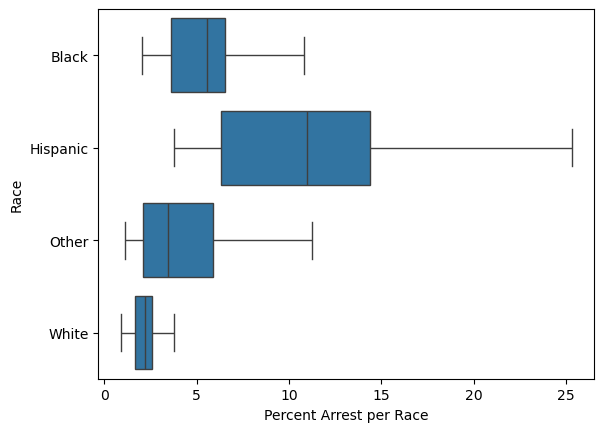

In [14]:
hp.box_arrest(extended_arrest)

### <span style="color: blue;">Question Four</span>

Using data science, there are many ways to analyze data and identify patterns, as we did in this section.  
With the four methods of displaying data above (table, single bar chart, grouped bar chart, and box plot), consider the following questions and answer below:

1. Which display of data was your favorite and why? In what ways was it the most helpful, and where did it fall short?  
2. How did looking at the percent per race compare to just viewing the raw numbers?  
3. Which visualization made it easiest to compare trends over multiple years? Why?  
4. How did the box plot help in understanding the spread and variation in the data compared to the bar charts?  
5. If you were to analyze a different dataset, which of these methods would you choose, and would you use any additional visualizations?

*Answer where your professor has instructed you to.*


# Redlining and Gentrification

Redlining and gentrification are interconnected processes that have shaped urban landscapes and deeply impacted marginalized communities.

**Redlining** was a discriminatory practice in which certain neighborhoods—often predominantly inhabited by people of color—were marked as high-risk areas for investment.  
This led to long-lasting disparities in housing access, public services, and economic opportunities. These neighborhoods were denied loans, infrastructure, and investment, which fueled cycles of poverty and disinvestment.

As **gentrification** occurs, these once-redlined areas are often targeted for redevelopment. While this can lead to economic revitalization, it frequently results in the displacement of lower-income, long-standing residents—exacerbating existing social and racial inequalities.

Gentrification is particularly harmful to marginalized communities because it leads to:
- The loss of affordable housing  
- Displacement of residents  
- Erasure of cultural identity  
- Increased policing and surveillance  
- Disruption of social networks and support systems  
- Rising economic pressure on low-income families  

These changes often result in increased criminalization of the very communities that are being displaced, deepening structural inequality.

---

Use the widget below to display felony arrests across different counties.  
Explore the data and make some initial observations.


In [1]:
display(widgets.interactive(lambda x : hp.map_f_arrest(arrest, x), x=hp.county_dropdown))

NameError: name 'widgets' is not defined

Data science is a powerful tool, but it doesn’t always capture the full picture.  
In the case of gentrification and its effects on crime, for example, we often rely on county-level data to track trends.  
However, these broader datasets can miss the nuances essential for a complete understanding.

County-level data may show a decrease in crime rates, but that doesn’t account for the displacement of marginalized communities, increased surveillance, or social upheaval happening at the neighborhood level.  
To draw more accurate and truthful conclusions, data scientists must recognize the limitations of their data and acknowledge the context these numbers exist within.

Without considering the underlying social dynamics—such as increased policing, changing community structures, and economic pressures—analysis can present an incomplete or misleading picture.  
Understanding these limitations and broader social context is essential for producing more accurate insights and making informed, responsible decisions.

---

### 📝 To-Do:

Choose one or two counties from the list below and read about how gentrification has impacted them.  
Then, use the widget above to explore the data and make observations.

**Reflection Prompt:**  
How does the historical information provided align with the trends shown in the data? In what ways?

---

### County Information

1. **San Francisco County**  
   *Gentrification Start: Early 1990s*  
   Neighborhoods like the Mission District, Tenderloin, and Bayview-Hunters Point have seen significant gentrification driven by tech industry growth.  
   Rising housing costs and an influx of wealthier residents have displaced long-time working-class communities.

2. **Los Angeles County**  
   *Gentrification Start: Early 2000s (accelerated in 2010s)*  
   Areas like Downtown LA, Echo Park, Silver Lake, and Highland Park have been transformed by rising rents, real estate development, and an influx of young professionals, displacing lower-income, immigrant, and minority communities.

3. **Oakland (Alameda County)**  
   *Gentrification Start: Mid-2000s*  
   Neighborhoods such as West Oakland, Fruitvale, and Uptown have experienced gentrification as higher-income residents moved in due to San Francisco’s rising costs, leading to displacement.

4. **Santa Clara County (San Jose)**  
   *Gentrification Start: Early 2000s*  
   The tech boom in Silicon Valley increased housing demand, particularly in downtown San Jose and surrounding areas, displacing lower-income, predominantly Latino communities.

5. **San Diego County**  
   *Gentrification Start: Mid-2000s*  
   Neighborhoods like North Park, Logan Heights, and Barrio Logan have gentrified as property values rose. This process accelerated in the 2010s, drawing wealthier residents into traditionally working-class Latino areas.

6. **Sacramento County**  
   *Gentrification Start: 2010s*  
   Oak Park, Midtown, and the River District have seen rising rents and new development, contributing to the displacement of long-time residents amid regional economic growth.

7. **Riverside County**  
   *Gentrification Start: Mid-2010s*  
   Though less known for gentrification, areas like Riverside and Moreno Valley have seen increased development and rising rents as people seek housing outside Los Angeles, pushing out lower-income communities.

8. **Ventura County**  
   *Gentrification Start: Early 2000s*  
   Cities like Oxnard and Ventura have experienced transformation as rising LA housing prices pushed people further out, affecting historically affordable, working-class Latino neighborhoods.


### <span style="color: blue;">Question Five</span>

How does the historical information provided align with the trends shown in the data?  
In what ways do the trends reflect or contradict what you learned about gentrification and its effects on communities?

*Answer where your professor has instructed you to.*


### Sources  
https://en.wikipedia.org/wiki/Gentrification_of_San_Francisco
https://www.urbandisplacement.org/maps/los-angeles-gentrification-and-displacement/
https://www.urbandisplacement.org/wp-content/uploads/2021/08/alameda_final.pdf
https://clsepa.org/media-great-silicon-valley-land-grab/
https://storymaps.arcgis.com/stories/96ab5b185efb415c94024a9371295543
https://sacramentoappraisalblog.com/2022/01/26/gentrification-neighborhood-boundaries-and-bias/
https://journals.sagepub.com/doi/10.1177/0308518X211053642?icid=int.sj-abstract.similar-articles.4
https://foothilldragonpress.org/286831/a-latest/gentrification-and-its-impacts-on-ventura/
https://info.primarycare.hms.harvard.edu/perspectives/articles/redlining-gentrification-health-outcomes
https://www.brennancenter.org/our-work/analysis-opinion/1994-crime-bill-and-beyond-how-federal-funding-shapes-criminal-justice
https://www.britannica.com/topic/war-on-drugs

## 📋 Post-Notebook Reflection Form

Thank you for completing the notebook! We’d love to hear your thoughts so we can continue improving and creating content that supports your learning.

Please take a few minutes to fill out this short reflection form:

👉 **[Click here to fill out the Reflection Form](https://docs.google.com/forms/d/e/1FAIpQLSd38uJNsiY_xV0S2LTu4zAZnaYPkphOMAvz4mNbngWuJYB7dg/viewform?usp=header)**

---

### 🧠 Why it matters:
Your feedback helps us understand:
- How clear and helpful the notebook was
- What you learned from the experience
- How your views on data science may have changed
- What topics you’d like to see in the future

This form is anonymous and should take less than 5 minutes to complete.

We appreciate your time and honest input! 💬
